# Files needed
* prompt file
* generated images

# Read the pkl file containing the prompts, the time needed for image generation and the generated images

In [1]:
import pickle
from tqdm import tqdm
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
modelName = 'DALL-E_1024'
vqaModel = 'git-large'

#vqa_models = {
#    "git-large": ("GIT", "microsoft/git-large-vqav2"),
#    "git-base": ("GIT", "microsoft/git-base-vqav2"),
#    "blip-large": ("BLIP", "Salesforce/blip-vqa-capfilt-large"),
#    "blip-base": ("BLIP", "Salesforce/blip-vqa-base"),
#    "vilt": ("VILT", "dandelin/vilt-b32-finetuned-vqa"),
#    "promptcap-t5large": ("PromptCap", "vqascore/promptcap-coco-vqa"),
#    "ofa-large": ("OFA", "damo/ofa_visual-question-answering_pretrain_large_en"),
#    "mplug-large": ("MPLUG", "damo/mplug_visual-question-answering_coco_large_en"),
#    "blip2-flant5xl": ("BLIP2", "pretrain_flant5xl"),
#}


input_prompt_file_path = '/kaggle/input/jpprompts/prompts.txt'

if modelName == 'DALL-E_512':
    images_path = '/kaggle/input/jpimages512'

elif modelName == 'DALL-E_1024':
    images_path = '/kaggle/input/jpimages'

elif modelName == 'SDXL_512':
    images_path = '/kaggle/input/generated-images-sdxl-512'

elif modelName == 'SDXL_1024':
    images_path = '/kaggle/input/sdxl-images'

elif modelName == 'FLUX_SCHNELL_512':
    images_path = '/kaggle/input/generated-images-flux-schnell-512'

elif modelName == 'FLUX_SCHNELL_1024':
    images_path = '/kaggle/input/generated-images-flux-schnell-1024'

elif modelName == 'SDXL_TURBO_512':
    images_path = '/kaggle/input/generated-images-sdxl-turbo-512'

elif modelName == 'SDXL_TURBO_1024':
    images_path = '/kaggle/input/generated-images-sdxl-turbo-1024'
    

imageList = []
    
with open(input_prompt_file_path) as file:
    # add only those entries in the list from the prompt file that do not have '#' identifier
    prompt_list = [line.rstrip() for line in file if '#' not in line]

'''
for i in tqdm(range(len(prompt_list))):
    entry = prompt_list[i].split(' : ')
    #print('/kaggle/input/jpimages/', entry[0] + '.webp')
    if modelName == 'DALL-E 2':
        im = cv2.imread(os.path.join('/kaggle/input/jpimages/', entry[0] + '.webp'))
        image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        
    elif modelName == 'SDXL':
        image = cv2.imread(os.path.join('/kaggle/input/sdxl-images/', entry[0] + '.png'))
    
    pixels = np.array(image)
    #imageList.append(torch.from_numpy(pixels))
'''

"\nfor i in tqdm(range(len(prompt_list))):\n    entry = prompt_list[i].split(' : ')\n    #print('/kaggle/input/jpimages/', entry[0] + '.webp')\n    if modelName == 'DALL-E 2':\n        im = cv2.imread(os.path.join('/kaggle/input/jpimages/', entry[0] + '.webp'))\n        image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)\n        \n    elif modelName == 'SDXL':\n        image = cv2.imread(os.path.join('/kaggle/input/sdxl-images/', entry[0] + '.png'))\n    \n    pixels = np.array(image)\n    #imageList.append(torch.from_numpy(pixels))\n"

# TIFA (Text to Image Faithfulness Evaluation)

In [3]:
!git clone https://github.com/Yushi-Hu/tifa.git
%cd tifa
!pip install -r requirements.txt
!pip install -e .

Cloning into 'tifa'...
remote: Enumerating objects: 271, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 271 (delta 49), reused 21 (delta 7), pack-reused 179 (from 1)
Receiving objects: 100% (271/271), 6.18 MiB | 27.86 MiB/s, done.
Resolving deltas: 100% (137/137), done.
/kaggle/working/tifa
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 80.0 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... - \ | / done
  Preparing metadata (pyproject.toml) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 15.7 MB/s eta 0:00:00
  Instal

# Setup the pipeline to generate the questions

In [4]:
from tifascore import get_llama2_pipeline, get_llama2_question_and_answers
pipeline = get_llama2_pipeline("tifa-benchmark/llama2_tifa_question_generation")

/opt/conda/lib/python3.10/site-packages/fairscale/experimental/nn/offload.py:19: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  return torch.cuda.amp.custom_fwd(orig_func)  # type: ignore
/opt/conda/lib/python3.10/site-packages/fairscale/experimental/nn/offload.py:30: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  return torch.cuda.amp.custom_bwd(orig_func)  # type: ignore


config.json:   0%|          | 0.00/626 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

# Generate the questions from the prompts

In [5]:
import time
prompts = [entry.split(' : ')[1] for entry in prompt_list]
image_corresponding_to_prompt = [entry.split(' : ')[0] for entry in prompt_list]
prompts_length = [len(i.split(' ')) for i in prompts]
timeList = []

llama_questions = {}

areLlamaQuestionsAvailable = True

#print('prompts: \n', prompts)
#print('prompts_length: \n', prompts_length)
#print('image_corresponding_to_prompt: \n', image_corresponding_to_prompt)

In [6]:
if areLlamaQuestionsAvailable != True:
    count = 0

    for i in tqdm(range(len(prompts))):
        #i = 196
        start = time.time()
        promptID = int(prompt_list[i].split(' : ')[0])
        prompt = prompt_list[i].split(' : ')[1]
        print(promptID, prompt)
        #print(type(promptID))
        
        # skip those prompts that do not generate a question when using QA & LM
        if promptID in [30, 139]:
            #print('continue')
            continue
        
        questions = get_llama2_question_and_answers(pipeline, prompt)
    
        # llama2_questions has the same format as the gpt3_questions
        
        #for i in tqdm(range(len(questions))):
        #    print(questions[i])
        end = time.time()
        #print('time: ',  end-start)
        #print('xxxxxxx')
        timeList.append(end-start)
        llama_questions[prompts.index(prompt)] = questions
    
        count += 1
        #if count == 3:
        #    break

elif areLlamaQuestionsAvailable:
    llamaQuestionsPath = '/kaggle/input/llamaquestionstifa'
    llamaQuestionsFiles = os.listdir(llamaQuestionsPath)
    llamaQuestionsVariableList = []
    
    
    for i in llamaQuestionsFiles:
        with open(os.path.join(llamaQuestionsPath, i), 'rb') as file:
            data = pickle.load(file)
            llamaQuestionsVariableList.append(data)
    allSame = all(content == llamaQuestionsVariableList[0] for content in llamaQuestionsVariableList)
    print(allSame)
    llama_questions = llamaQuestionsVariableList[np.random.randint(0, len(llamaQuestionsVariableList))]

True


In [7]:
print('len llama questions: ', len(llama_questions))
#print('llama_questions: ', llama_questions.keys())
#for i in llama_questions:
#    print('xxxxx')
#    print('llama_questions: ', llama_questions)

len llama questions:  198


In [8]:
if areLlamaQuestionsAvailable != True:
    with open('/kaggle/working/llamaquestions_'+modelName+'_'+vqaModel+'.pkl', 'wb') as f:
        pickle.dump(llama_questions, f)
    
    with open('/kaggle/working/time_llamaquestions_'+modelName+'_'+vqaModel+'.pkl', 'wb') as f:
        pickle.dump(timeList, f)

In [9]:
#print(len(llama_questions))
#print(llama_questions)

In [10]:
#!rm -rf /kaggle/working/pdfs
#!rm -rf /kaggle/working/pngs

In [11]:
#os.makedirs('/kaggle/working/pngs/')
#os.makedirs('/kaggle/working/pdfs/')

In [12]:
# randomly displaying a generated image
#import matplotlib.pyplot as plt

#images = [im[2] for im in imageList]

#for im, prompt in tqdm(zip(imageList[:testLength], prompts[:testLength]), total=testLength):
#    plt.imshow(im)
#    plt.axis('off')
#    plt.title(prompt)
    #plt.show()
#    plt.savefig('/kaggle/working/pngs/'+prompt+'.png', bbox_inches='tight', pad_inches=0)
    #plt.savefig('/kaggle/working/pdfs/'+prompt+'.pdf', bbox_inches='tight', pad_inches=0)

# Load the VQA model

In [13]:
from tifascore import VQAModel

# automatically on GPU if detect CUDA.
# support all above VQA models. Here we use mplug-large as an example.
model = VQAModel(vqaModel)

Loading git-large...


preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.58G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

Finish loading git-large


tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Using SBERT on GPU


In [14]:
print(len(llama_questions))

#for i in llama_questions:
#    print(llama_questions[i])

198


# TIFA Computation

  0%|          | 0/200 [00:00<?, ?it/s]

i :  0
[{'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'conductor', 'question': 'who is conducting an orchestra?', 'choices': ['conductor', 'musician', 'singer', 'dancer'], 'answer': 'conductor', 'element_type': 'animal/human'}, {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'orchestra', 'question': 'is this an orchestra?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'object'}, {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'orchestra', 'question': 'what type of group is this?', 'choices': ['orchestra', 'band', 'choir', 'dance troupe'], 'answer': 'orchestra', 'element_type': 'object'}, {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 'conducting', 'question': 'is the conductor conducting an orchestra?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'activity'}, {'caption': 'conductor conducting an orchestra, shot from behind', 'element': 

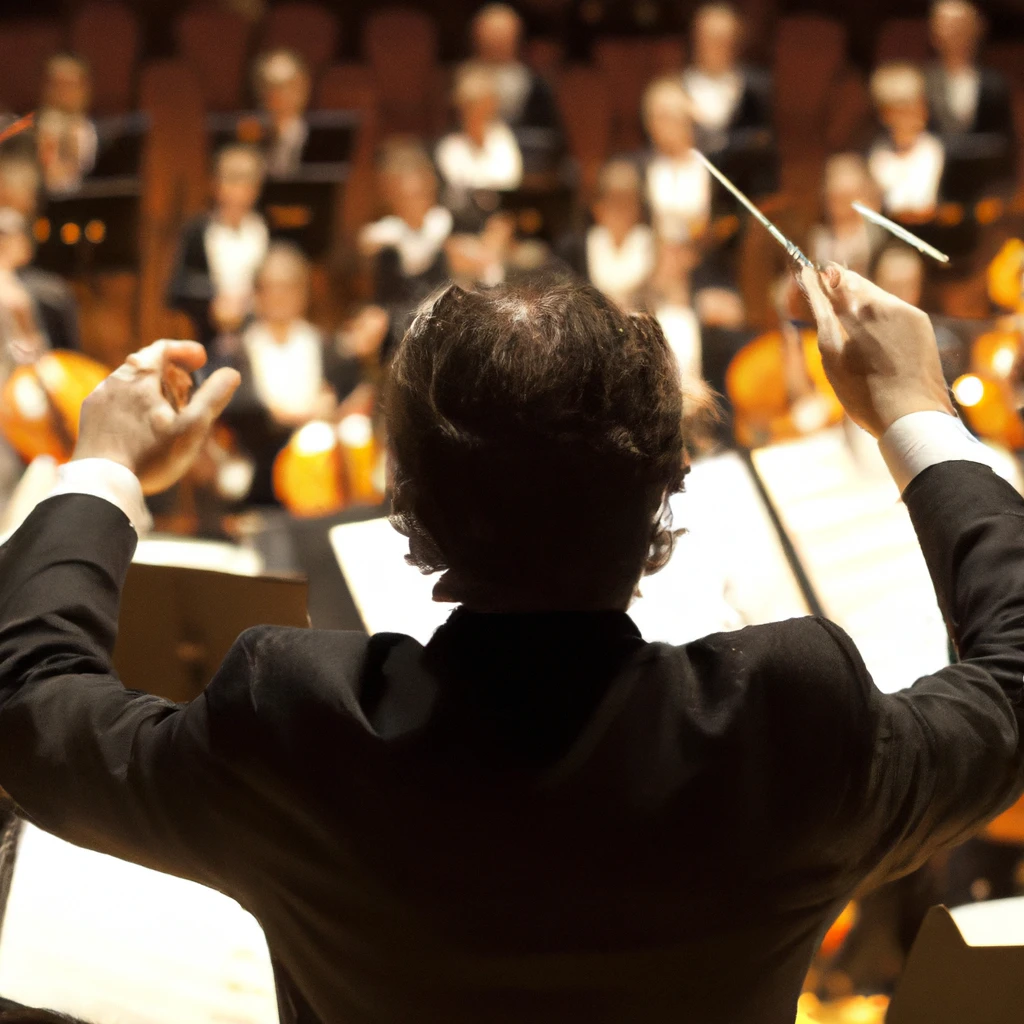

im shape:  (1024, 1024, 3)



  0%|          | 1/200 [00:05<17:05,  5.16s/it]

i :  1
[{'caption': 'a soldier saluting, news photograph', 'element': 'soldier', 'question': 'who is saluting?', 'choices': ['soldier', 'policeman', 'fireman', 'nurse'], 'answer': 'soldier', 'element_type': 'animal/human'}, {'caption': 'a soldier saluting, news photograph', 'element': 'saluting', 'question': 'is the soldier saluting?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'activity'}, {'caption': 'a soldier saluting, news photograph', 'element': 'saluting', 'question': 'what is the soldier doing?', 'choices': ['saluting', 'waving', 'shaking', 'nothing'], 'answer': 'saluting', 'element_type': 'activity'}, {'caption': 'a soldier saluting, news photograph', 'element': 'news photograph', 'question': 'is this a news photograph?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'attribute'}, {'caption': 'a soldier saluting, news photograph', 'element': 'news photograph', 'question': 'is this a news photograph, a painting, or a drawing?', 'choices': ['news pho

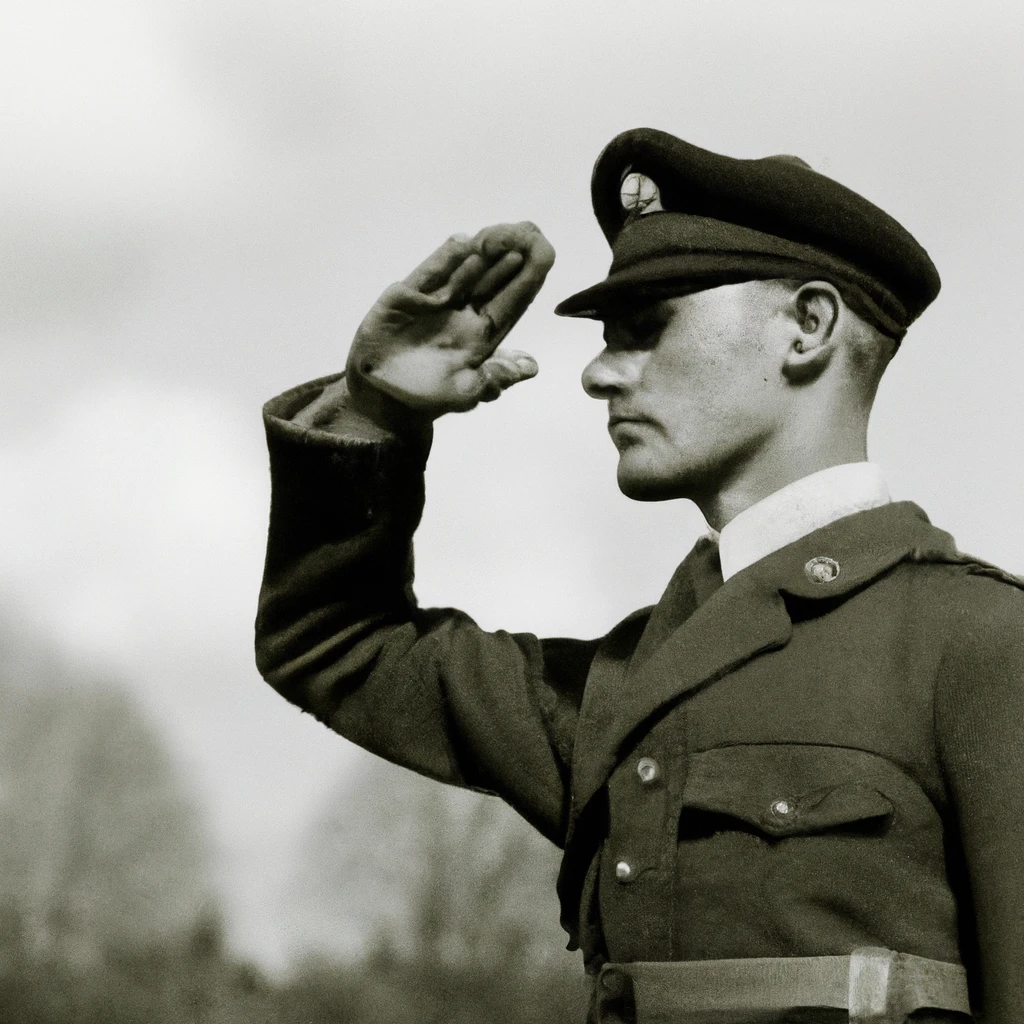

im shape:  (1024, 1024, 3)



  1%|          | 2/200 [00:08<13:45,  4.17s/it]

i :  2
[{'caption': 'road bicycle, studio lighting', 'element': 'road bicycle', 'question': 'what type of vehicle is this?', 'choices': ['road bicycle', 'motorcycle', 'car', 'bus'], 'answer': 'road bicycle', 'element_type': 'object'}, {'caption': 'road bicycle, studio lighting', 'element': 'studio lighting', 'question': 'is there studio lighting?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'object'}, {'caption': 'road bicycle, studio lighting', 'element': 'studio lighting', 'question': 'what type of lighting is this?', 'choices': ['studio lighting', 'street lighting', 'office lighting', 'home lighting'], 'answer': 'studio lighting', 'element_type': 'object'}]


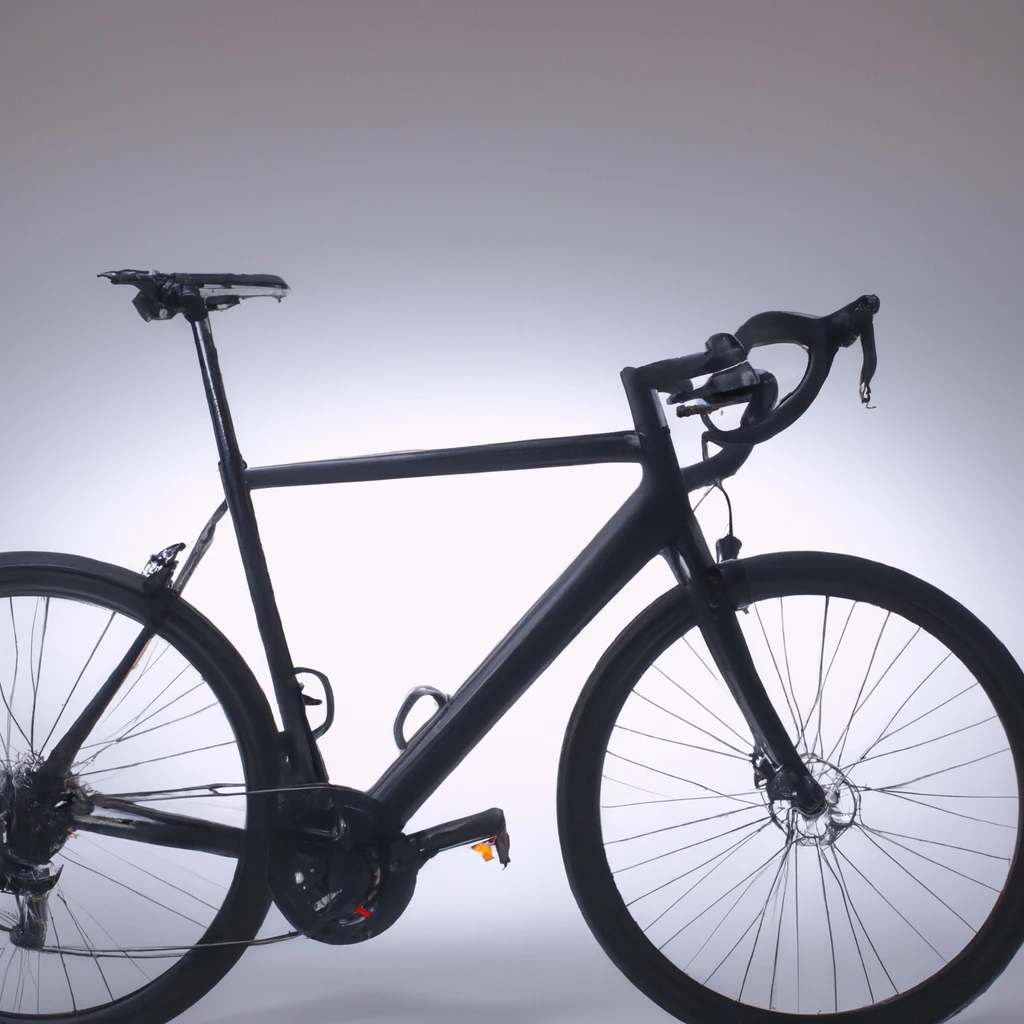

im shape:  (1024, 1024, 3)



  2%|▏         | 3/200 [00:10<10:16,  3.13s/it]

i :  3
[{'caption': 'an A4 clipboard, stock photograph', 'element': 'clipboard', 'question': 'what type of object is this?', 'choices': ['clipboard', 'notebook', 'book', 'magazine'], 'answer': 'clipboard', 'element_type': 'object'}, {'caption': 'an A4 clipboard, stock photograph', 'element': 'A4', 'question': 'is this an A4 clipboard?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'attribute'}, {'caption': 'an A4 clipboard, stock photograph', 'element': 'A4', 'question': 'is this an A4 or an A3 clipboard?', 'choices': ['A4', 'A3', 'A5', 'A6'], 'answer': 'A4', 'element_type': 'attribute'}, {'caption': 'an A4 clipboard, stock photograph', 'element': 'stock photograph', 'question': 'is this a stock photograph?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'attribute'}, {'caption': 'an A4 clipboard, stock photograph', 'element': 'stock photograph', 'question': 'is this a stock photograph, a painting, or a drawing?', 'choices': ['stock photograph', 'painting', '

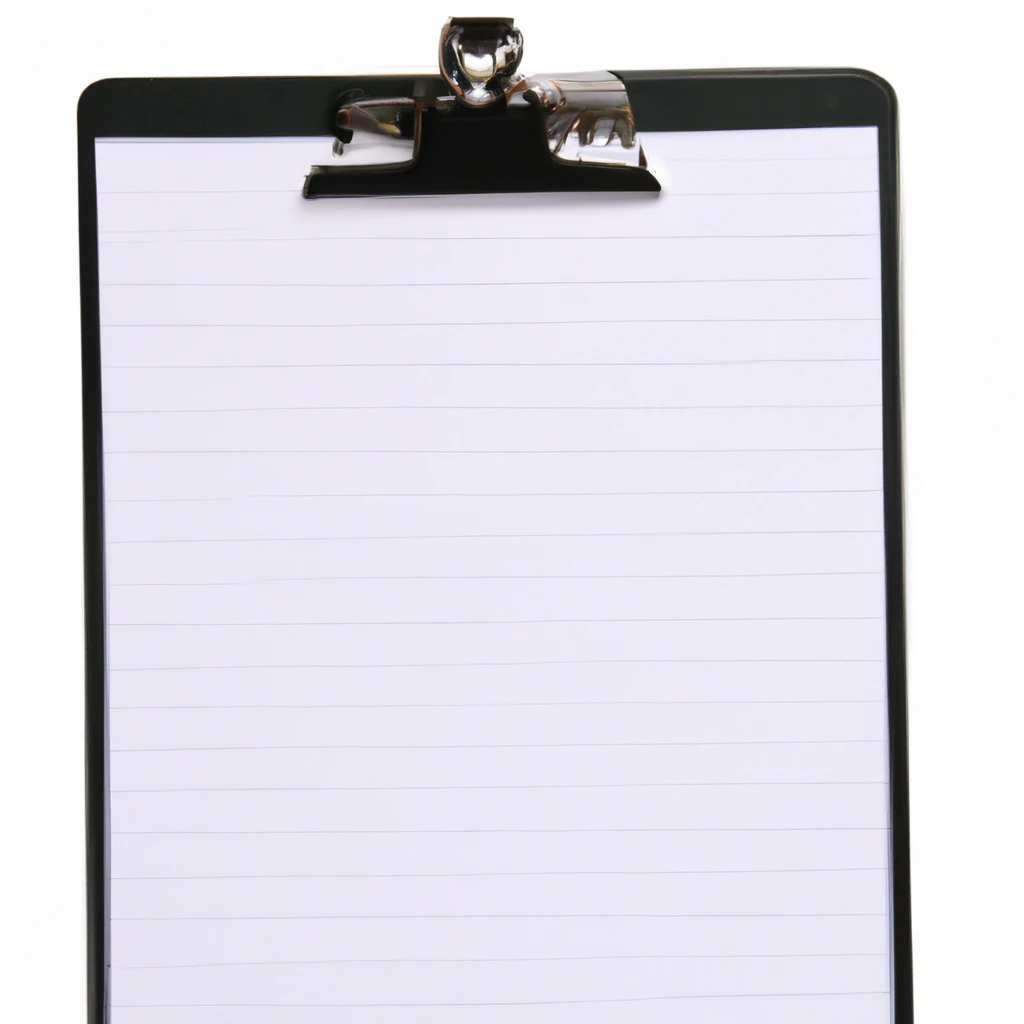

im shape:  (1024, 1024, 3)



  2%|▏         | 4/200 [00:13<10:37,  3.25s/it]

i :  4
im shape:  (1024, 1024, 3)



  2%|▎         | 5/200 [00:16<09:25,  2.90s/it]

i :  5
im shape:  (1024, 1024, 3)



  3%|▎         | 6/200 [00:20<10:21,  3.21s/it]

i :  6
im shape:  (1024, 1024, 3)



  4%|▎         | 7/200 [00:26<14:05,  4.38s/it]

i :  7
im shape:  (1024, 1024, 3)



  4%|▍         | 8/200 [00:30<13:10,  4.12s/it]

i :  8
im shape:  (1024, 1024, 3)



  4%|▍         | 9/200 [00:33<12:20,  3.88s/it]

i :  9
im shape:  (1024, 1024, 3)



  5%|▌         | 10/200 [00:37<12:34,  3.97s/it]

i :  10
im shape:  (1024, 1024, 3)



  6%|▌         | 11/200 [00:39<10:29,  3.33s/it]

i :  11
im shape:  (1024, 1024, 3)



  6%|▌         | 12/200 [00:44<11:41,  3.73s/it]

i :  12
im shape:  (1024, 1024, 3)



  6%|▋         | 13/200 [00:50<13:41,  4.39s/it]

i :  13
im shape:  (1024, 1024, 3)



  7%|▋         | 14/200 [00:55<14:46,  4.77s/it]

i :  14
im shape:  (1024, 1024, 3)



  8%|▊         | 15/200 [00:58<12:21,  4.01s/it]

i :  15
im shape:  (1024, 1024, 3)



  8%|▊         | 16/200 [01:02<12:49,  4.18s/it]

i :  16
im shape:  (1024, 1024, 3)



  8%|▊         | 17/200 [01:09<15:12,  4.98s/it]

i :  17
im shape:  (1024, 1024, 3)



  9%|▉         | 18/200 [01:14<14:51,  4.90s/it]

i :  18
im shape:  (1024, 1024, 3)



 10%|▉         | 19/200 [01:20<16:04,  5.33s/it]

i :  19
im shape:  (1024, 1024, 3)



 10%|█         | 20/200 [01:27<16:59,  5.67s/it]

i :  20
im shape:  (1024, 1024, 3)



 10%|█         | 21/200 [01:32<16:49,  5.64s/it]

i :  21
im shape:  (1024, 1024, 3)



 11%|█         | 22/200 [01:39<17:17,  5.83s/it]

i :  22
im shape:  (1024, 1024, 3)



 12%|█▏        | 23/200 [01:42<14:51,  5.04s/it]

i :  23
im shape:  (1024, 1024, 3)



 12%|█▏        | 24/200 [01:48<16:03,  5.47s/it]

i :  24
im shape:  (1024, 1024, 3)



 12%|█▎        | 25/200 [01:53<15:48,  5.42s/it]

i :  25
im shape:  (1024, 1024, 3)



 13%|█▎        | 26/200 [02:02<18:11,  6.27s/it]

i :  26
im shape:  (1024, 1024, 3)



 14%|█▎        | 27/200 [02:06<15:58,  5.54s/it]

i :  27
im shape:  (1024, 1024, 3)



 14%|█▍        | 28/200 [02:09<14:03,  4.91s/it]

i :  28
im shape:  (1024, 1024, 3)



 14%|█▍        | 29/200 [02:11<11:46,  4.13s/it]

i :  30
im shape:  (1024, 1024, 3)



 16%|█▌        | 31/200 [02:17<10:14,  3.64s/it]

i :  31
im shape:  (1024, 1024, 3)



 16%|█▌        | 32/200 [02:24<12:19,  4.40s/it]

i :  32
im shape:  (1024, 1024, 3)



 16%|█▋        | 33/200 [02:30<13:17,  4.78s/it]

i :  33
im shape:  (1024, 1024, 3)



 17%|█▋        | 34/200 [02:35<13:10,  4.76s/it]

i :  34
im shape:  (1024, 1024, 3)



 18%|█▊        | 35/200 [02:40<13:50,  5.03s/it]

i :  35
im shape:  (1024, 1024, 3)



 18%|█▊        | 36/200 [02:48<15:54,  5.82s/it]

i :  36
im shape:  (1024, 1024, 3)



 18%|█▊        | 37/200 [02:53<15:10,  5.59s/it]

i :  37
im shape:  (1024, 1024, 3)



 19%|█▉        | 38/200 [03:00<16:20,  6.05s/it]

i :  38
im shape:  (1024, 1024, 3)



 20%|█▉        | 39/200 [03:05<14:53,  5.55s/it]

i :  39
im shape:  (1024, 1024, 3)



 20%|██        | 40/200 [03:12<15:53,  5.96s/it]

i :  40
im shape:  (1024, 1024, 3)



 20%|██        | 41/200 [03:14<12:54,  4.87s/it]

i :  41
im shape:  (1024, 1024, 3)



 21%|██        | 42/200 [03:20<13:19,  5.06s/it]

i :  42
im shape:  (1024, 1024, 3)



 22%|██▏       | 43/200 [03:26<14:13,  5.44s/it]

i :  43
im shape:  (1024, 1024, 3)



 22%|██▏       | 44/200 [03:28<11:41,  4.50s/it]

i :  44
im shape:  (1024, 1024, 3)



 22%|██▎       | 45/200 [03:31<10:40,  4.13s/it]

i :  45
im shape:  (1024, 1024, 3)



 23%|██▎       | 46/200 [03:37<11:45,  4.58s/it]

i :  46
im shape:  (1024, 1024, 3)



 24%|██▎       | 47/200 [03:41<11:01,  4.32s/it]

i :  47
im shape:  (1024, 1024, 3)



 24%|██▍       | 48/200 [03:43<09:40,  3.82s/it]

i :  48
im shape:  (1024, 1024, 3)



 24%|██▍       | 49/200 [03:50<11:58,  4.76s/it]

i :  49
im shape:  (1024, 1024, 3)



 25%|██▌       | 50/200 [03:56<12:38,  5.06s/it]

i :  50
im shape:  (1024, 1024, 3)



 26%|██▌       | 51/200 [04:00<12:02,  4.85s/it]

i :  51
im shape:  (1024, 1024, 3)



 26%|██▌       | 52/200 [04:05<11:33,  4.69s/it]

i :  52
im shape:  (1024, 1024, 3)



 26%|██▋       | 53/200 [04:11<12:18,  5.03s/it]

i :  53
im shape:  (1024, 1024, 3)



 27%|██▋       | 54/200 [04:18<13:50,  5.69s/it]

i :  54
im shape:  (1024, 1024, 3)



 28%|██▊       | 55/200 [04:24<13:49,  5.72s/it]

i :  55
im shape:  (1024, 1024, 3)



 28%|██▊       | 56/200 [04:30<14:06,  5.88s/it]

i :  56
im shape:  (1024, 1024, 3)



 28%|██▊       | 57/200 [04:36<14:14,  5.98s/it]

i :  57
im shape:  (1024, 1024, 3)



 29%|██▉       | 58/200 [04:43<14:53,  6.29s/it]

i :  58
im shape:  (1024, 1024, 3)



 30%|██▉       | 59/200 [04:48<13:42,  5.84s/it]

i :  59
im shape:  (1024, 1024, 3)



 30%|███       | 60/200 [04:56<15:16,  6.55s/it]

i :  60
im shape:  (1024, 1024, 3)



 30%|███       | 61/200 [05:02<14:46,  6.38s/it]

i :  61
im shape:  (1024, 1024, 3)



 31%|███       | 62/200 [05:09<14:47,  6.43s/it]

i :  62
im shape:  (1024, 1024, 3)



 32%|███▏      | 63/200 [05:15<14:20,  6.28s/it]

i :  63
im shape:  (1024, 1024, 3)



 32%|███▏      | 64/200 [05:26<17:52,  7.89s/it]

i :  64
im shape:  (1024, 1024, 3)



 32%|███▎      | 65/200 [05:34<17:35,  7.82s/it]

i :  65
im shape:  (1024, 1024, 3)



 33%|███▎      | 66/200 [05:42<17:48,  7.97s/it]

i :  66
im shape:  (1024, 1024, 3)



 34%|███▎      | 67/200 [05:49<16:44,  7.55s/it]

i :  67
im shape:  (1024, 1024, 3)



 34%|███▍      | 68/200 [05:56<16:27,  7.48s/it]

i :  68
im shape:  (1024, 1024, 3)



 34%|███▍      | 69/200 [06:03<16:03,  7.36s/it]

i :  69
im shape:  (1024, 1024, 3)



 35%|███▌      | 70/200 [06:09<15:01,  6.94s/it]

i :  70
im shape:  (1024, 1024, 3)



 36%|███▌      | 71/200 [06:17<15:29,  7.20s/it]

i :  71
im shape:  (1024, 1024, 3)



 36%|███▌      | 72/200 [06:23<14:36,  6.85s/it]

i :  72
im shape:  (1024, 1024, 3)



 36%|███▋      | 73/200 [06:30<14:26,  6.82s/it]

i :  73
im shape:  (1024, 1024, 3)



 37%|███▋      | 74/200 [06:37<14:37,  6.96s/it]

i :  74
im shape:  (1024, 1024, 3)



 38%|███▊      | 75/200 [06:43<14:01,  6.73s/it]

i :  75
im shape:  (1024, 1024, 3)



 38%|███▊      | 76/200 [06:50<13:52,  6.71s/it]

i :  76
im shape:  (1024, 1024, 3)



 38%|███▊      | 77/200 [06:57<14:07,  6.89s/it]

i :  77
im shape:  (1024, 1024, 3)



 39%|███▉      | 78/200 [07:02<12:57,  6.37s/it]

i :  78
im shape:  (1024, 1024, 3)



 40%|███▉      | 79/200 [07:11<14:04,  6.98s/it]

i :  79
im shape:  (1024, 1024, 3)



 40%|████      | 80/200 [07:16<13:03,  6.53s/it]

i :  80
im shape:  (1024, 1024, 3)



 40%|████      | 81/200 [07:23<12:56,  6.52s/it]

i :  81
im shape:  (1024, 1024, 3)



 41%|████      | 82/200 [07:31<13:40,  6.95s/it]

i :  82
im shape:  (1024, 1024, 3)



 42%|████▏     | 83/200 [07:39<14:19,  7.35s/it]

i :  83
im shape:  (1024, 1024, 3)



 42%|████▏     | 84/200 [07:41<11:13,  5.80s/it]

i :  84
im shape:  (1024, 1024, 3)



 42%|████▎     | 85/200 [07:48<11:31,  6.01s/it]

i :  85
im shape:  (1024, 1024, 3)



 43%|████▎     | 86/200 [07:53<10:55,  5.75s/it]

i :  86
im shape:  (1024, 1024, 3)



 44%|████▎     | 87/200 [07:59<11:19,  6.01s/it]

i :  87
im shape:  (1024, 1024, 3)



 44%|████▍     | 88/200 [08:06<11:20,  6.08s/it]

i :  88
im shape:  (1024, 1024, 3)



 44%|████▍     | 89/200 [08:10<10:19,  5.58s/it]

i :  89
im shape:  (1024, 1024, 3)



 45%|████▌     | 90/200 [08:15<09:59,  5.45s/it]

i :  90
im shape:  (1024, 1024, 3)



 46%|████▌     | 91/200 [08:20<09:21,  5.15s/it]

i :  91
im shape:  (1024, 1024, 3)



 46%|████▌     | 92/200 [08:25<09:14,  5.13s/it]

i :  92
im shape:  (1024, 1024, 3)



 46%|████▋     | 93/200 [08:32<10:29,  5.88s/it]

i :  93
im shape:  (1024, 1024, 3)



 47%|████▋     | 94/200 [08:39<10:36,  6.00s/it]

i :  94
im shape:  (1024, 1024, 3)



 48%|████▊     | 95/200 [08:42<08:53,  5.08s/it]

i :  95
im shape:  (1024, 1024, 3)



 48%|████▊     | 96/200 [08:47<09:12,  5.32s/it]

i :  96
im shape:  (1024, 1024, 3)



 48%|████▊     | 97/200 [08:50<07:33,  4.40s/it]

i :  97
im shape:  (1024, 1024, 3)



 49%|████▉     | 98/200 [08:56<08:25,  4.95s/it]

i :  98
im shape:  (1024, 1024, 3)



 50%|████▉     | 99/200 [09:03<09:30,  5.65s/it]

i :  99
im shape:  (1024, 1024, 3)



 50%|█████     | 100/200 [09:10<10:05,  6.06s/it]

i :  100
im shape:  (1024, 1024, 3)



 50%|█████     | 101/200 [09:17<10:18,  6.24s/it]

i :  101
im shape:  (1024, 1024, 3)



 51%|█████     | 102/200 [09:24<10:21,  6.35s/it]

i :  102
im shape:  (1024, 1024, 3)



 52%|█████▏    | 103/200 [09:29<09:42,  6.00s/it]

i :  103
im shape:  (1024, 1024, 3)



 52%|█████▏    | 104/200 [09:35<09:33,  5.97s/it]

i :  104
im shape:  (1024, 1024, 3)



 52%|█████▎    | 105/200 [09:41<09:36,  6.07s/it]

i :  105
im shape:  (1024, 1024, 3)



 53%|█████▎    | 106/200 [09:47<09:25,  6.02s/it]

i :  106
im shape:  (1024, 1024, 3)



 54%|█████▎    | 107/200 [09:51<08:36,  5.55s/it]

i :  107
im shape:  (1024, 1024, 3)



 54%|█████▍    | 108/200 [09:55<07:49,  5.11s/it]

i :  108
im shape:  (1024, 1024, 3)



 55%|█████▍    | 109/200 [09:59<07:07,  4.69s/it]

i :  109
im shape:  (1024, 1024, 3)



 55%|█████▌    | 110/200 [10:05<07:34,  5.05s/it]

i :  110
im shape:  (1024, 1024, 3)



 56%|█████▌    | 111/200 [10:10<07:41,  5.18s/it]

i :  111
im shape:  (1024, 1024, 3)



 56%|█████▌    | 112/200 [10:15<07:14,  4.93s/it]

i :  112
im shape:  (1024, 1024, 3)



 56%|█████▋    | 113/200 [10:19<06:54,  4.77s/it]

i :  113
im shape:  (1024, 1024, 3)



 57%|█████▋    | 114/200 [10:25<07:19,  5.11s/it]

i :  114
im shape:  (1024, 1024, 3)



 57%|█████▊    | 115/200 [10:29<06:36,  4.67s/it]

i :  115
im shape:  (1024, 1024, 3)



 58%|█████▊    | 116/200 [10:36<07:48,  5.58s/it]

i :  116
im shape:  (1024, 1024, 3)



 58%|█████▊    | 117/200 [10:44<08:26,  6.11s/it]

i :  117
im shape:  (1024, 1024, 3)



 59%|█████▉    | 118/200 [10:49<07:56,  5.82s/it]

i :  118
im shape:  (1024, 1024, 3)



 60%|█████▉    | 119/200 [10:54<07:33,  5.60s/it]

i :  119
im shape:  (1024, 1024, 3)



 60%|██████    | 120/200 [10:59<07:16,  5.45s/it]

i :  120
im shape:  (1024, 1024, 3)



 60%|██████    | 121/200 [11:04<06:45,  5.13s/it]

i :  121
im shape:  (1024, 1024, 3)



 61%|██████    | 122/200 [11:10<07:06,  5.47s/it]

i :  122
im shape:  (1024, 1024, 3)



 62%|██████▏   | 123/200 [11:18<08:01,  6.25s/it]

i :  123
im shape:  (1024, 1024, 3)



 62%|██████▏   | 124/200 [11:24<07:45,  6.12s/it]

i :  124
im shape:  (1024, 1024, 3)



 62%|██████▎   | 125/200 [11:30<07:33,  6.04s/it]

i :  125
im shape:  (1024, 1024, 3)



 63%|██████▎   | 126/200 [11:34<06:49,  5.54s/it]

i :  126
im shape:  (1024, 1024, 3)



 64%|██████▎   | 127/200 [11:39<06:36,  5.43s/it]

i :  127
im shape:  (1024, 1024, 3)



 64%|██████▍   | 128/200 [11:47<07:19,  6.10s/it]

i :  128
im shape:  (1024, 1024, 3)



 64%|██████▍   | 129/200 [11:54<07:32,  6.37s/it]

i :  129
im shape:  (1024, 1024, 3)



 65%|██████▌   | 130/200 [12:02<08:08,  6.99s/it]

i :  130
im shape:  (1024, 1024, 3)



 66%|██████▌   | 131/200 [12:08<07:46,  6.77s/it]

i :  131
im shape:  (1024, 1024, 3)



 66%|██████▌   | 132/200 [12:15<07:43,  6.82s/it]

i :  132
im shape:  (1024, 1024, 3)



 66%|██████▋   | 133/200 [12:21<07:18,  6.55s/it]

i :  133
im shape:  (1024, 1024, 3)



 67%|██████▋   | 134/200 [12:24<06:01,  5.48s/it]

i :  134
im shape:  (1024, 1024, 3)



 68%|██████▊   | 135/200 [12:32<06:38,  6.14s/it]

i :  135
im shape:  (1024, 1024, 3)



 68%|██████▊   | 136/200 [12:39<06:52,  6.44s/it]

i :  136
im shape:  (1024, 1024, 3)



 68%|██████▊   | 137/200 [12:47<07:11,  6.85s/it]

i :  137
im shape:  (1024, 1024, 3)



 69%|██████▉   | 138/200 [12:51<06:20,  6.14s/it]

i :  139
im shape:  (1024, 1024, 3)



 70%|███████   | 140/200 [12:53<03:39,  3.66s/it]

i :  140
im shape:  (1024, 1024, 3)



 70%|███████   | 141/200 [12:58<03:57,  4.02s/it]

i :  141
im shape:  (1024, 1024, 3)



 71%|███████   | 142/200 [13:04<04:16,  4.43s/it]

i :  142
im shape:  (1024, 1024, 3)



 72%|███████▏  | 143/200 [13:09<04:23,  4.62s/it]

i :  143
im shape:  (1024, 1024, 3)



 72%|███████▏  | 144/200 [13:12<04:03,  4.35s/it]

i :  144
im shape:  (1024, 1024, 3)



 72%|███████▎  | 145/200 [13:17<04:01,  4.38s/it]

i :  145
im shape:  (1024, 1024, 3)



 73%|███████▎  | 146/200 [13:21<03:56,  4.39s/it]

i :  146
im shape:  (1024, 1024, 3)



 74%|███████▎  | 147/200 [13:25<03:47,  4.29s/it]

i :  147
im shape:  (1024, 1024, 3)



 74%|███████▍  | 148/200 [13:30<03:56,  4.55s/it]

i :  148
im shape:  (1024, 1024, 3)



 74%|███████▍  | 149/200 [13:35<03:49,  4.50s/it]

i :  149
im shape:  (1024, 1024, 3)



 75%|███████▌  | 150/200 [13:39<03:44,  4.49s/it]

i :  150
im shape:  (1024, 1024, 3)



 76%|███████▌  | 151/200 [13:45<03:59,  4.89s/it]

i :  151
im shape:  (1024, 1024, 3)



 76%|███████▌  | 152/200 [13:51<04:03,  5.07s/it]

i :  152
im shape:  (1024, 1024, 3)



 76%|███████▋  | 153/200 [13:55<03:49,  4.89s/it]

i :  153
im shape:  (1024, 1024, 3)



 77%|███████▋  | 154/200 [14:00<03:39,  4.77s/it]

i :  154
im shape:  (1024, 1024, 3)



 78%|███████▊  | 155/200 [14:05<03:39,  4.87s/it]

i :  155
im shape:  (1024, 1024, 3)



 78%|███████▊  | 156/200 [14:10<03:46,  5.15s/it]

i :  156
im shape:  (1024, 1024, 3)



 78%|███████▊  | 157/200 [14:15<03:31,  4.92s/it]

i :  157
im shape:  (1024, 1024, 3)



 79%|███████▉  | 158/200 [14:20<03:28,  4.97s/it]

i :  158
im shape:  (1024, 1024, 3)



 80%|███████▉  | 159/200 [14:22<02:50,  4.16s/it]

i :  159
im shape:  (1024, 1024, 3)



 80%|████████  | 160/200 [14:27<02:57,  4.45s/it]

i :  160
im shape:  (1024, 1024, 3)



 80%|████████  | 161/200 [14:32<02:53,  4.44s/it]

i :  161
im shape:  (1024, 1024, 3)



 81%|████████  | 162/200 [14:36<02:47,  4.42s/it]

i :  162
im shape:  (1024, 1024, 3)



 82%|████████▏ | 163/200 [14:43<03:06,  5.05s/it]

i :  163
im shape:  (1024, 1024, 3)



 82%|████████▏ | 164/200 [14:51<03:34,  5.95s/it]

i :  164
im shape:  (1024, 1024, 3)



 82%|████████▎ | 165/200 [14:55<03:11,  5.48s/it]

i :  165
im shape:  (1024, 1024, 3)



 83%|████████▎ | 166/200 [15:02<03:23,  5.97s/it]

i :  166
im shape:  (1024, 1024, 3)



 84%|████████▎ | 167/200 [15:10<03:33,  6.48s/it]

i :  167
im shape:  (1024, 1024, 3)



 84%|████████▍ | 168/200 [15:15<03:17,  6.19s/it]

i :  168
im shape:  (1024, 1024, 3)



 84%|████████▍ | 169/200 [15:23<03:22,  6.52s/it]

i :  169
im shape:  (1024, 1024, 3)



 85%|████████▌ | 170/200 [15:29<03:10,  6.33s/it]

i :  170
im shape:  (1024, 1024, 3)



 86%|████████▌ | 171/200 [15:34<02:59,  6.19s/it]

i :  171
im shape:  (1024, 1024, 3)



 86%|████████▌ | 172/200 [15:37<02:26,  5.22s/it]

i :  172
im shape:  (1024, 1024, 3)



 86%|████████▋ | 173/200 [15:41<02:11,  4.87s/it]

i :  173
im shape:  (1024, 1024, 3)



 87%|████████▋ | 174/200 [15:45<01:57,  4.52s/it]

i :  174
im shape:  (1024, 1024, 3)



 88%|████████▊ | 175/200 [15:50<01:52,  4.49s/it]

i :  175
im shape:  (1024, 1024, 3)



 88%|████████▊ | 176/200 [15:55<01:57,  4.88s/it]

i :  176
im shape:  (1024, 1024, 3)



 88%|████████▊ | 177/200 [16:01<01:58,  5.16s/it]

i :  177
im shape:  (1024, 1024, 3)



 89%|████████▉ | 178/200 [16:05<01:43,  4.72s/it]

i :  178
im shape:  (1024, 1024, 3)



 90%|████████▉ | 179/200 [16:11<01:46,  5.06s/it]

i :  179
im shape:  (1024, 1024, 3)



 90%|█████████ | 180/200 [16:17<01:46,  5.33s/it]

i :  180
im shape:  (1024, 1024, 3)



 90%|█████████ | 181/200 [16:23<01:46,  5.59s/it]

i :  181
im shape:  (1024, 1024, 3)



 91%|█████████ | 182/200 [16:28<01:40,  5.57s/it]

i :  182
im shape:  (1024, 1024, 3)



 92%|█████████▏| 183/200 [16:35<01:37,  5.76s/it]

i :  183
im shape:  (1024, 1024, 3)



 92%|█████████▏| 184/200 [16:38<01:22,  5.17s/it]

i :  184
im shape:  (1024, 1024, 3)



 92%|█████████▎| 185/200 [16:41<01:04,  4.30s/it]

i :  185
im shape:  (1024, 1024, 3)



 93%|█████████▎| 186/200 [16:46<01:03,  4.56s/it]

i :  186
im shape:  (1024, 1024, 3)



 94%|█████████▎| 187/200 [16:51<01:00,  4.62s/it]

i :  187
im shape:  (1024, 1024, 3)



 94%|█████████▍| 188/200 [16:53<00:46,  3.89s/it]

i :  188
im shape:  (1024, 1024, 3)



 94%|█████████▍| 189/200 [17:01<00:56,  5.11s/it]

i :  189
im shape:  (1024, 1024, 3)



 95%|█████████▌| 190/200 [17:04<00:45,  4.57s/it]

i :  190
im shape:  (1024, 1024, 3)



 96%|█████████▌| 191/200 [17:09<00:42,  4.74s/it]

i :  191
im shape:  (1024, 1024, 3)



 96%|█████████▌| 192/200 [17:15<00:41,  5.19s/it]

i :  192
im shape:  (1024, 1024, 3)



 96%|█████████▋| 193/200 [17:21<00:37,  5.29s/it]

i :  193
im shape:  (1024, 1024, 3)



 97%|█████████▋| 194/200 [17:27<00:32,  5.47s/it]

i :  194
im shape:  (1024, 1024, 3)



 98%|█████████▊| 195/200 [17:31<00:24,  4.93s/it]

i :  195
im shape:  (1024, 1024, 3)



 98%|█████████▊| 196/200 [17:36<00:20,  5.25s/it]

i :  196
im shape:  (1024, 1024, 3)



 98%|█████████▊| 197/200 [17:39<00:13,  4.57s/it]

i :  197
im shape:  (1024, 1024, 3)



 99%|█████████▉| 198/200 [17:43<00:08,  4.29s/it]

i :  198
im shape:  (1024, 1024, 3)



100%|█████████▉| 199/200 [17:47<00:04,  4.31s/it]

i :  199
im shape:  (1024, 1024, 3)



100%|██████████| 200/200 [17:51<00:00,  5.36s/it]

count:  198


In [15]:
import os
from PIL import Image
import glob
from tifascore import get_question_and_answers, filter_question_and_answers, UnifiedQAModel, tifa_score_single, VQAModel
import openai

#image_paths = glob.glob('/kaggle/working/pngs/*.png')

TIFA_SCORE = []

count = 0

for i in tqdm(range(len(prompt_list))):
    #print(images_path+'/'+str(i+1)+'.webp')
    #if 196 in llama_questions:
    #    print('196')
    #i =196

    if i in llama_questions:
        
        count += 1

        print('i : ', i)
        
        #print(images_path)
        #print(i)
        # calculuate TIFA score
        if modelName == 'DALL-E_1024' :
            #FIX THE DALL E 512 x 512 TIFA COMPUTATION 
            if count < 5:
                print(llama_questions[i])
                im = cv2.imread(images_path+'/'+str(i+1)+'.webp')
                im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
                display(Image.fromarray(im))
            print('im shape: ', im.shape)
            result = tifa_score_single(model, llama_questions[i], images_path+'/'+str(i+1)+'.webp')

        elif modelName == 'DALL-E_512':
            if count < 5:
                print(llama_questions[i])
                im = cv2.imread(images_path+'/'+str(i+1)+'.webp')
                im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
                print('image shape: ', im.shape)
                display(Image.fromarray(im))
            print('im shape: ', im.shape)
            result = tifa_score_single(model, llama_questions[i], images_path+'/'+str(i+1)+'.webp')
            
        elif modelName == 'SDXL_512' or modelName == 'SDXL_1024' or modelName == 'SDXL_TURBO_512' or modelName == 'SDXL_TURBO_1024':
            if count < 5:
                print(llama_questions[i])
                if modelName == 'SDXL_1024' or modelName == 'SDXL_TURBO_1024':
                    im = cv2.imread(images_path+'/'+str(i+1)+'.png')
                elif modelName == 'SDXL_512' or modelName == 'SDXL_TURBO_512':
                    print('images path: ', images_path)
                    im = cv2.imread(images_path+'/'+str(i+1)+'.png')
                im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
                display(Image.fromarray(im))
            if modelName == 'SDXL_1024' or modelName == 'SDXL_TURBO_1024':
                result = tifa_score_single(model, llama_questions[i], images_path+'/'+str(i+1)+'.png')
            elif modelName == 'SDXL_512' or modelName == 'SDXL_TURBO_512':
                result = tifa_score_single(model, llama_questions[i], images_path+'/'+str(i+1)+'.png')
            print('im shape: ', im.shape)

        elif modelName == 'FLUX_SCHNELL_512' or modelName == 'FLUX_SCHNELL_1024':
            if count < 5:
                print(llama_questions[i])
                im = cv2.imread(images_path+'/'+str(i+1)+'.png')
                im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
                display(Image.fromarray(im))
            print('im shape: ', im.shape)
            result = tifa_score_single(model, llama_questions[i], images_path+'/'+str(i+1)+'.png')
        
        #elif modelName == 'SDXL_TURBO':
        #    if count < 5:
        #        print(llama_questions[i])
        #        im = cv2.imread(images_path+'/'+str(i+1)+'_1.png')
        #        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        #        display(Image.fromarray(im))
        #    result = tifa_score_single(model, llama_questions[i], images_path+'/'+str(i+1)+'_1.png')
        
        #print(f"TIFA score is {result['tifa_score']}")   # 0.33
        #plt.imshow(imageList[i])
        #plt.title('TIFA SCORE: '+str(result['tifa_score']))
        #plt.show()
        #print(result)
        TIFA_SCORE.append(result)
        
    else:
        continue

print('count: ', count)

with open('/kaggle/working/tifaScore_'+modelName+'_'+vqaModel+'.pkl', 'wb') as f:
    pickle.dump(TIFA_SCORE, f)

In [16]:
print('Done')
#print(TIFA_SCORE)

Done


In [17]:
print(len(TIFA_SCORE))

198


# Downloading generated output files from the notebook session

In [18]:
#!zip -r /kaggle/working/image_pngs.zip /kaggle/working/pngs
#!zip -r /kaggle/working/image_pdfs.zip /kaggle/working/pdfs

In [19]:
#from IPython.display import FileLink
#FileLink(r'/kaggle/working/image_pngs.zip')

In [20]:
#FileLink(r'/kaggle/working/image_pdfs.zip')

In [21]:
#references:
#https://lightning.ai/docs/torchmetrics/stable/multimodal/clip_score.html
#https://torchmetrics.readthedocs.io/en/v0.8.0/image/frechet_inception_distance.html
#https://lightning.ai/docs/torchmetrics/stable/image/inception_score.html#torchmetrics.image.inception.InceptionScore
#https://github.com/Yushi-Hu/tifa

In [22]:
# potential installation issue with tifa (post december 2024)